# day 119 and day 120 and day 121



# Neural Network Regression:

### Framework:

1. Input layer shape; # of features.

2. Hidden layer(s); problem specific. minimum=1, maximum = infinity

3. Neurons per hidden layers. problem specific, generally hovers between 10 and 100

4. Output layer shape; output shape.

5. Hidden Activation. methods:usually ReLU (Rectified Linear Unit)

6. Output Activation. methods,None,ReLU, Logistic, Tanh

7. Loss Function. methods:MSE (mean squarred Error) and MAE(Mean Absolute Error) and combinition of both in case of outliers.

8. Optimiser. methods: Stochastic Gradient Descent(SGD), ADAM.

In [ ]:
import tensorflow as tf
import pandas as pd
import numpy as np
import sympy as sym
from IPython.display import display,Math
sym.init_printing()
import matplotlib.pyplot as plt
import seaborn as sns


In [ ]:
tf.__version__

'2.12.0'

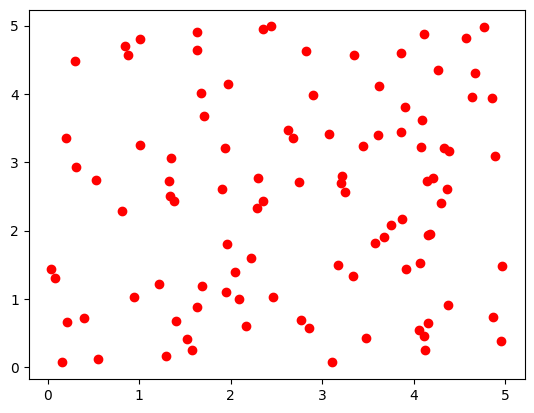

In [ ]:
x = np.random.rand(100)*5
y = np.random.rand(100)*5

plt.plot(x,y,'ro')

plt.show()

**(remember one of most common errors in deep learning is input and output shapes)**

In [ ]:
# defining feature(x) and output(y) # answer is 3x+2
x = [7,8,6,-3,2,1,78,33,12]
y = [23,26,20,-7,8,5,236,101,38]

# tensoring the variables
x = tf.constant(x)
y = tf.constant(y)

x = tf.cast(x,dtype=tf.float32)
y = tf.cast(y,dtype=tf.float32)

# we want to find out what makes x to become y

 **steps in modelling in Tensorflow:**


1. **creating the model:** find the input and output layers as well as the hidden layers of the deep learning model.



2. **compiling the model:** establish the loss function(mae,mse to find how accurate the model is(accuracy = 1 - Error)), optimiser(performance booster or accuracy enhancers such as gradient descent), and evaluation metrics (to see how the model performs with unseen data)



3. **fitting the model** - letting the model find the patterns between x & y (features and labels)

In [ ]:
# defining feature(x) and output(y)
x = [7,8,6,-3,2,1,78,33,12] # shape(9,)
y = [23,26,20,-7,8,5,236,101,38] # shape(9,)

# tensoring the variables
x = tf.constant(x)
y = tf.constant(y)

x = tf.cast(x,dtype=tf.float32)
y = tf.cast(y,dtype=tf.float32)


# expanding the dimension of the x data
x = tf.expand_dims(x,axis=1) # axis=1 means we want to add new dimension as our 2nd dimension

# we want to find out what makes x to become y


# set random seed
tf.random.set_seed(42)

# creating the model
model = tf.keras.Sequential()
model.add(tf.keras.layers.Dense(1)) # we are adding only one neuron here with one hidden layer.

# compiling the model
model.compile(loss = tf.keras.losses.MeanAbsoluteError(),
              metrics=[tf.keras.metrics.MeanAbsoluteError()], # Remember: it has a box encapsulating the contents
              optimizer=tf.keras.optimizers.SGD()) # Remember: SGD() is a function.

# fitting the model
model.fit(x, y, epochs=100) # epochs determine how many times the model goes through the training data





Epoch 1/100
1/1 [==============================] - 1s 595ms/step - loss: 35.2242 - mean_absolute_error: 35.2242
Epoch 2/100
1/1 [==============================] - 0s 14ms/step - loss: 32.4403 - mean_absolute_error: 32.4403
Epoch 3/100
1/1 [==============================] - 0s 15ms/step - loss: 29.6565 - mean_absolute_error: 29.6565
Epoch 4/100
1/1 [==============================] - 0s 13ms/step - loss: 26.8727 - mean_absolute_error: 26.8727
Epoch 5/100
1/1 [==============================] - 0s 12ms/step - loss: 24.0889 - mean_absolute_error: 24.0889
Epoch 6/100
1/1 [==============================] - 0s 10ms/step - loss: 21.3050 - mean_absolute_error: 21.3050
Epoch 7/100
1/1 [==============================] - 0s 10ms/step - loss: 18.5212 - mean_absolute_error: 18.5212
Epoch 8/100
1/1 [==============================] - 0s 12ms/step - loss: 15.7374 - mean_absolute_error: 15.7374
Epoch 9/100
1/1 [==============================] - 0s 12ms/step - loss: 12.9535 - mean_absolute_error: 12.9535


In [ ]:
model = tf.keras.Sequential(tf.keras.layers.Dense(1))
help(model.compile)

Help on method compile in module keras.engine.training:

compile(optimizer='rmsprop', loss=None, metrics=None, loss_weights=None, weighted_metrics=None, run_eagerly=None, steps_per_execution=None, jit_compile=None, **kwargs) method of keras.engine.sequential.Sequential instance
    Configures the model for training.
    
    Example:
    
    ```python
    model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=1e-3),
                  loss=tf.keras.losses.BinaryCrossentropy(),
                  metrics=[tf.keras.metrics.BinaryAccuracy(),
                           tf.keras.metrics.FalseNegatives()])
    ```
    
    Args:
        optimizer: String (name of optimizer) or optimizer instance. See
          `tf.keras.optimizers`.
        loss: Loss function. May be a string (name of loss function), or
          a `tf.keras.losses.Loss` instance. See `tf.keras.losses`. A loss
          function is any callable with the signature `loss = fn(y_true,
          y_pred)`, where `y_true` 

In [ ]:
# make prediction with an unseen data

model.predict([9,10,11])

# it is pretty close the real answer is 3x + 2 =  29

ValueError: ignored

In [ ]:
model.predict([3])

# improving the model to make the prediction more accurate


# steps:

1. **In creation part**: improve the model by adding more layers or hidden layers(neurons). within each of the hidden layers, change the activation function of each layer.


2. **In compilation part**: we may change the optimizer, or we may also change the learning rate of optimizer.


3. **In fitting part**: we may increase the epochs number (make the model see the training data more times that is.)


# improving with creation(adding more neurons and hidden layers(dendrites))

In [ ]:
# creating the model

model = tf.keras.Sequential()
# model.add(tf.keras.layers.Dense(100, activation='relu'))
# model.add(tf.keras.layers.Dense(100, activation='relu'))
# model.add(tf.keras.layers.Dense(100, activation='relu'))
model.add(tf.keras.layers.Dense(1))


# compiling the model
model.compile(loss= tf.keras.losses.MeanAbsoluteError(),
            optimizer= tf.keras.optimizers.SGD(),
              metrics=[tf.keras.metrics.MeanAbsoluteError()])

# fitting the model with higher epochs
model.fit(x,y,epochs=98)



In [ ]:
model.predict([9])

# adding more layers and hidden layers(which means more neurons and dendrites) and see if it improves the model or disimproves it.

In [ ]:
# creating the model

model = tf.keras.Sequential()
# model.add(tf.keras.layers.Dense(100, activation='relu'))
# model.add(tf.keras.layers.Dense(100, activation='relu'))
# model.add(tf.keras.layers.Dense(100, activation='relu'))
model.add(tf.keras.layers.Dense(1))


# compiling the model
model.compile(loss= tf.keras.losses.MeanAbsoluteError(),
            optimizer= tf.keras.optimizers.SGD(),
              metrics=[tf.keras.metrics.MeanAbsoluteError()])

# fitting the model with higher epochs
model.fit(x,y,epochs=98)



In [ ]:
# predicting

model.predict([9]) # the closer or equal it is to 29 the better!

# reducing a neuron to see the performance

In [ ]:

# creating the model

model = tf.keras.Sequential()
model.add(tf.keras.layers.Dense(350, activation=None)) # layers means extra neurons and Dense means depth of dendrites


model.add(tf.keras.layers.Dense(1))


# compiling the model
model.compile(loss= tf.keras.losses.MeanAbsoluteError(),
            optimizer= tf.keras.optimizers.Adam(learning_rate=0.001), #learning rate determines how slow or fast the algorithm moves, lower it is slower it moves
              metrics=[tf.keras.metrics.MeanAbsoluteError()])

# fitting the model with higher epochs
model.fit(x,y,epochs=100)



In [ ]:
model.predict([9,10,11])


# perfect

# conclusion:

1. **learning_rate is the most important hyperparameter to tweak to see improvement in the model's performance**

2. **epochs is the second most important hyperparameter to tweak to see improvement in the model's performance**

3. **number of hidden layers in a neural layer is the third most important hyperparameter to tweak to see improvement in the model's performance**

# evaluating the model

In [ ]:
# making the data set larger

# getting the training data set larger

# features
x = tf.constant(np.arange(-200,200,4),dtype=tf.float32)

# labels
y = 3*x + 2


x,y

In [ ]:
help(train_test_split)

# day 122 and day 123 and day 124

In [ ]:
import numpy as np
import sympy as sym
from IPython.display import display,Math
sym.init_printing()
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import tensorflow as tf

In [ ]:
# supplying the features and labels
x = tf.constant(np.array([1,2,3,4,5,6,7,8,22,38,32,80,91,11,17,189]),dtype=tf.float32)
y = 3*x + 2

# dimension change (adding an extra dimension to the feature)
x = tf.expand_dims(x,axis=1)



# establish the model and the neural layers
model = tf.keras.Sequential()
model.add(tf.keras.layers.Dense(300,activation=None))
model.add(tf.keras.layers.Dense(1))

# compilation
model.compile(loss=tf.keras.losses.MeanAbsoluteError(),
           optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
               metrics=tf.keras.metrics.MeanAbsoluteError())


# fitting
model.fit(x,y,epochs=100)


Epoch 1/100
1/1 [==============================] - 6s 6s/step - loss: 94.5374 - mean_absolute_error: 94.5374
Epoch 2/100
1/1 [==============================] - 0s 29ms/step - loss: 93.1756 - mean_absolute_error: 93.1756
Epoch 3/100
1/1 [==============================] - 0s 34ms/step - loss: 91.8128 - mean_absolute_error: 91.8128
Epoch 4/100
1/1 [==============================] - 0s 33ms/step - loss: 90.4485 - mean_absolute_error: 90.4485
Epoch 5/100
1/1 [==============================] - 0s 20ms/step - loss: 89.0826 - mean_absolute_error: 89.0826
Epoch 6/100
1/1 [==============================] - 0s 25ms/step - loss: 87.7147 - mean_absolute_error: 87.7147
Epoch 7/100
1/1 [==============================] - 0s 18ms/step - loss: 86.3444 - mean_absolute_error: 86.3444
Epoch 8/100
1/1 [==============================] - 0s 10ms/step - loss: 84.9714 - mean_absolute_error: 84.9714
Epoch 9/100
1/1 [==============================] - 0s 16ms/step - loss: 83.5952 - mean_absolute_error: 83.5952
Epo

In [ ]:
model.predict([9,10,11])

1/1 [==============================] - 0s 158ms/step


array([[28.795141],
       [31.77862 ],
       [34.762104]], dtype=float32)

# evaluation

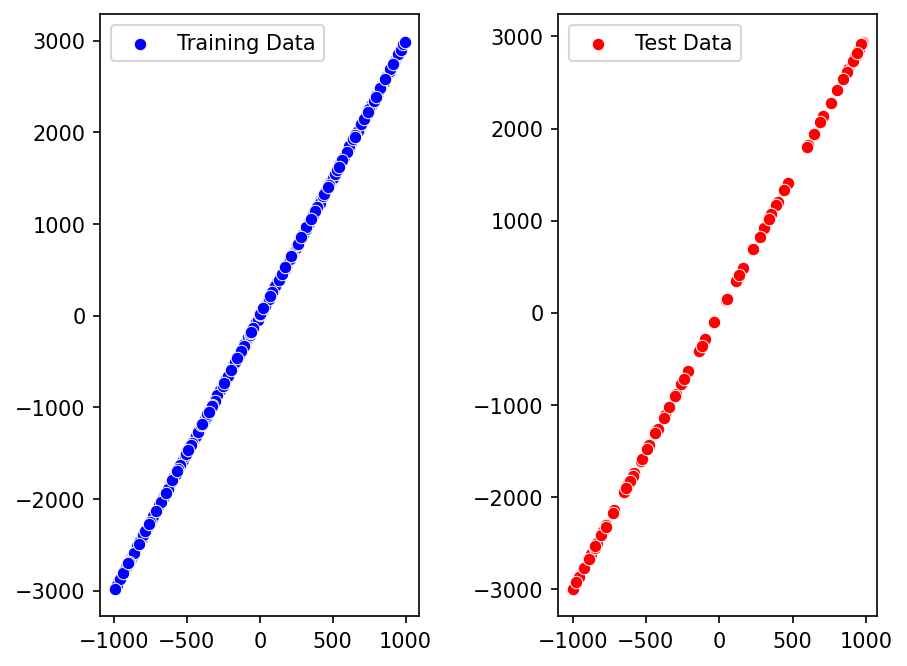

Epoch 1/500
10/10 [==============================] - 1s 3ms/step - loss: 1390.7482 - mean_absolute_error: 1390.7482
Epoch 2/500
10/10 [==============================] - 0s 3ms/step - loss: 1170.7855 - mean_absolute_error: 1170.7855
Epoch 3/500
10/10 [==============================] - 0s 3ms/step - loss: 942.3341 - mean_absolute_error: 942.3341
Epoch 4/500
10/10 [==============================] - 0s 3ms/step - loss: 697.8405 - mean_absolute_error: 697.8405
Epoch 5/500
10/10 [==============================] - 0s 3ms/step - loss: 427.6046 - mean_absolute_error: 427.6046
Epoch 6/500
10/10 [==============================] - 0s 3ms/step - loss: 124.6968 - mean_absolute_error: 124.6968
Epoch 7/500
10/10 [==============================] - 0s 3ms/step - loss: 83.1332 - mean_absolute_error: 83.1332
Epoch 8/500
10/10 [==============================] - 0s 3ms/step - loss: 33.3194 - mean_absolute_error: 33.3194
Epoch 9/500
10/10 [==============================] - 0s 3ms/step - loss: 15.5731 - mean_

In [ ]:
# making the data set larger

# getting the training data set larger

# features
x = np.arange(-1000,1000,5)

# labels
y = 3*x + 2


# splitting the data into training and test set

from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2,random_state=42)


# plotting the training and test data

fig,ax = plt.subplots(1,2,dpi=150)
sns.scatterplot(x = x_train,y = y_train,color = 'blue', label='Training Data',ax=ax[0])
sns.scatterplot(x = x_test,y= y_test, color = 'red', label = 'Test Data',ax=ax[1])

plt.tight_layout(pad=2)
plt.show()


# reshaping x_train and x_test for compatibility to ensure 2D shape with apt number of features
x_train = x_train.reshape(-1,1)
x_test = x_test.reshape(-1,1)

# preparing the inputs and outputs
x_train = tf.constant(tf.cast(x_train,dtype=tf.float32))
y_train = tf.constant(tf.cast(y_train,dtype=tf.float32))
x_test = tf.constant(tf.cast(x_test,dtype=tf.float32))
y_test = tf.constant(tf.cast(y_test,dtype=tf.float32))


# building the model
model = tf.keras.Sequential()
model.add(tf.keras.layers.Dense(350,activation=None))
model.add(tf.keras.layers.Dense(1))

# compiling
model.compile(loss=tf.keras.losses.MeanAbsoluteError(),
              optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
              metrics=[tf.keras.metrics.MeanAbsoluteError()])

# fitting with training_data
model.fit(x_train,y_train,epochs=500)

In [ ]:
model.predict([9,10,11])

1/1 [==============================] - 0s 151ms/step


array([[29.109766],
       [32.11846 ],
       [35.127163]], dtype=float32)

In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_2 (Dense)             (32, 350)                 700       
                                                                 
 dense_3 (Dense)             (32, 1)                   351       
                                                                 
Total params: 1,051
Trainable params: 1,051
Non-trainable params: 0
_________________________________________________________________


# Auto Build model(letting the model do the fitting on its own)

In [ ]:
tf.random.set_seed(42)

# setting the input shapes and neural layers
model = tf.keras.Sequential()
model.add(tf.keras.layers.Dense(1,input_shape=[1])) # input_shape is determined by # of inputs and # of outputs

# compiling
model.compile(loss=tf.keras.losses.MeanAbsoluteError(),
              optimizer=tf.keras.optimizers.SGD(),
              metrics=[tf.keras.metrics.MeanAbsoluteError()])



In [ ]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 1)                 2         
                                                                 
Total params: 2
Trainable params: 2
Non-trainable params: 0
_________________________________________________________________


**Total Params**: total number of parameters in the model.

**Trainable params**: these are the parameters(patterns) that the model can be updated on as the model trains.

**Non-trainable params**: these parameters aren't updated during training.(this is typical when you bring in already learned patterns or bring in parameters from other models during transfer learning).

# input neurons:

1. this is the number of features our data-set have. each feature is assigned a neuron.
2. for an image the number of feature is determined by the dimension of the picture, i.e for 720 * 360 = 259200 feautures/input neurons.


# output neurons:

1. one neuron is assigned for each output.

# General Strategy:
* first overfit then drop the redundant neural layers(Andrej karpathy strategy).

# in compilation

# loss function:

Regression: MeanSquaredError() would serve better in most cases. if there are many outliers in the data use MeanAbsoluteError().

classification: use CrossEntropy()

# batch size optimisation:

Batch size: between 2 and 32 batches are better according to Masters and Luschi.start smaller and slowly increase the size as the data gets more complex. keep on eye on best fit.


# learning_rate in optimizer:

learning_rate: start with something like 10^-6 and slowly increase it until the model is optimised to produce the least error.

# momentum in SGD():

momentum: start with a number closer to 1 like 0.9 and slowly increase it to one 0.95,0.99,0.99999 etc. until the model is maximally optimised.

# some strategies:

**to combat overfitting** : use RReLU
**to reduce latency at runtime**: use leaky ReLU
**for massive training sets**: use PReLU
**for fast inference times**: leaky ReLU
**if the network doesn't self normalize**: ELU
**for the overall robust activation function**: SELU







In [ ]:
model.fit(x_train,y_train,epochs=200,verbose= 0)

In [ ]:
model.predict([9,10,11])

1/1 [==============================] - 0s 82ms/step


array([[-15.933151],
       [-17.728918],
       [-19.524685]], dtype=float32)

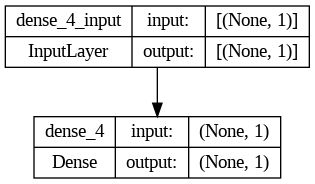

In [ ]:
from tensorflow.keras.utils import plot_model

plot_model(model=model,show_shapes=True)

In [ ]:
help(plot_model)

Help on function plot_model in module keras.utils.vis_utils:

plot_model(model, to_file='model.png', show_shapes=False, show_dtype=False, show_layer_names=True, rankdir='TB', expand_nested=False, dpi=96, layer_range=None, show_layer_activations=False, show_trainable=False)
    Converts a Keras model to dot format and save to a file.
    
    Example:
    
    ```python
    input = tf.keras.Input(shape=(100,), dtype='int32', name='input')
    x = tf.keras.layers.Embedding(
        output_dim=512, input_dim=10000, input_length=100)(input)
    x = tf.keras.layers.LSTM(32)(x)
    x = tf.keras.layers.Dense(64, activation='relu')(x)
    x = tf.keras.layers.Dense(64, activation='relu')(x)
    x = tf.keras.layers.Dense(64, activation='relu')(x)
    output = tf.keras.layers.Dense(1, activation='sigmoid', name='output')(x)
    model = tf.keras.Model(inputs=[input], outputs=[output])
    dot_img_file = '/tmp/model_1.png'
    tf.keras.utils.plot_model(model, to_file=dot_img_file, show_shapes=True)

In [ ]:
help(tf.keras.layers.Dense)

Help on class Dense in module keras.layers.core.dense:

class Dense(keras.engine.base_layer.Layer)
 |  Dense(units, activation=None, use_bias=True, kernel_initializer='glorot_uniform', bias_initializer='zeros', kernel_regularizer=None, bias_regularizer=None, activity_regularizer=None, kernel_constraint=None, bias_constraint=None, **kwargs)
 |  
 |  Just your regular densely-connected NN layer.
 |  
 |  `Dense` implements the operation:
 |  `output = activation(dot(input, kernel) + bias)`
 |  where `activation` is the element-wise activation function
 |  passed as the `activation` argument, `kernel` is a weights matrix
 |  created by the layer, and `bias` is a bias vector created by the layer
 |  (only applicable if `use_bias` is `True`). These are all attributes of
 |  `Dense`.
 |  
 |  Note: If the input to the layer has a rank greater than 2, then `Dense`
 |  computes the dot product between the `inputs` and the `kernel` along the
 |  last axis of the `inputs` and axis 0 of the `kern

In [ ]:
# model_building

model = tf.keras.Sequential(name='model_1')
model.add(tf.keras.layers.Dense(10,input_shape=[1],name='input_layer'))
model.add(tf.keras.layers.Dense(1,name='output_layer'))


# model_compilation

model.compile(loss=tf.keras.losses.MeanAbsoluteError(),
              optimizer=tf.keras.optimizers.SGD(),
              metrics=[tf.keras.metrics.MeanAbsoluteError()])

In [ ]:
# model summary

model.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_layer (Dense)         (None, 10)                20        
                                                                 
 output_layer (Dense)        (None, 1)                 11        
                                                                 
Total params: 31
Trainable params: 31
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.fit(x_train,y_train,epochs=100,verbose=0)

In [ ]:
model.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_layer (Dense)         (None, 10)                20        
                                                                 
 output_layer (Dense)        (None, 1)                 11        
                                                                 
Total params: 31
Trainable params: 31
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.predict([9,10,11])

1/1 [==============================] - 0s 64ms/step


array([[nan],
       [nan],
       [nan]], dtype=float32)

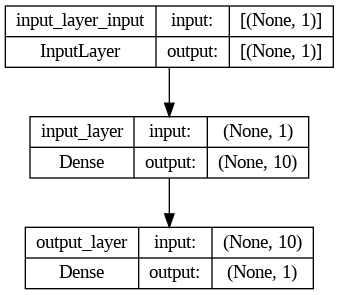

In [ ]:
from tensorflow.keras.utils import plot_model
plot_model(model=model,show_shapes=True)

In [ ]:
prediction = model.predict(x_test)
actual = y_test

actual-prediction

3/3 [==============================] - 0s 3ms/step


<tf.Tensor: shape=(80, 80), dtype=float32, numpy=
array([[ 9.1003418e-02,  1.0650911e+03, -2.6399089e+03, ...,
         2.4000911e+03, -4.9490900e+02,  1.2000911e+03],
       [-1.0638781e+03,  1.1219482e+00, -3.7038779e+03, ...,
         1.3361219e+03, -1.5588781e+03,  1.3612195e+02],
       [ 2.6375349e+03,  3.7025349e+03, -2.4650879e+00, ...,
         5.0375352e+03,  2.1425349e+03,  3.8375349e+03],
       ...,
       [-2.3975852e+03, -1.3325852e+03, -5.0375850e+03, ...,
         2.4147949e+00, -2.8925852e+03, -1.1975852e+03],
       [ 4.9461179e+02,  1.5596118e+03, -2.1453882e+03, ...,
         2.8946118e+03, -3.8821411e-01,  1.6946118e+03],
       [-1.1987471e+03, -1.3374707e+02, -3.8387471e+03, ...,
         1.2012529e+03, -1.6937471e+03,  1.2529297e+00]], dtype=float32)>

In [ ]:
model.predict([9,10,11])

1/1 [==============================] - 0s 90ms/step


array([[29.013557],
       [32.010654],
       [35.007748]], dtype=float32)

# visulizing model's layers

In [ ]:
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import plot_model

In [ ]:
# trail:

# x and y
x = np.arange(-1000,1000,4)
y = 3*x + 2

# random seed_settting
tf.random.set_seed(42)

# model_building
model = tf.keras.Sequential()
model.add(tf.keras.layers.Dense(30,input_shape=[1],name='input_layer'))
model.add(tf.keras.layers.Dense(80,name='hidden_layer1'))
model.add(tf.keras.layers.Dense(90,name='hidden_layer2'))
model.add(tf.keras.layers.Dense(1,activation='linear',name='output_layer'))

# compilation:
model.compile(loss=tf.keras.losses.MeanAbsoluteError(),
              optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001),
              metrics=[tf.keras.metrics.MeanSquaredError()])

#splitting
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2,random_state=42)

# conversion to tensors
x_train = tf.constant(x_train,dtype=tf.float32)
x_test = tf.constant(x_test,dtype=tf.float32)
y_train = tf.constant(y_train,dtype=tf.float32)
y_test = tf.constant(y_test,dtype=tf.float32)

model.fit(x_train,y_train,epochs=100,verbose=False)




# explanation,analysis and freethrows

In [ ]:
x_train[0:100]

<tf.Tensor: shape=(100,), dtype=float32, numpy=
array([  -4.,  732., -924.,  288.,  328., -776.,  204.,  -84.,  324.,
       -472., -452.,  692.,  340., -900.,  856.,  124.,  -12.,  -52.,
       -532., -832., -120., -296.,  280., -388.,  -76.,  -92.,  668.,
       -188., -496.,  316., -876., -548.,  880.,   84., -440., -772.,
       -232., -904., -932.,   60., -736., -168.,  916., -624.,   12.,
         64., -908., -112.,   44.,  704., -980., -536., -820., -936.,
        848.,  428., -988., -128.,  620., -760., -560.,  272.,  712.,
       -884.,  748.,  884., -896., -972.,  812., -568., -852., -372.,
        956., -528., -544., -300.,  492., -276., -424.,  476.,  560.,
       -220.,  616.,  100.,  816., -436.,  460., -732., -160., -328.,
        972.,  500.,  600.,   88., -564.,   -8., -420., -632., -392.,
        468.], dtype=float32)>

In [ ]:
y_train[0:100]

<tf.Tensor: shape=(100,), dtype=float32, numpy=
array([  -10.,  2198., -2770.,   866.,   986., -2326.,   614.,  -250.,
         974., -1414., -1354.,  2078.,  1022., -2698.,  2570.,   374.,
         -34.,  -154., -1594., -2494.,  -358.,  -886.,   842., -1162.,
        -226.,  -274.,  2006.,  -562., -1486.,   950., -2626., -1642.,
        2642.,   254., -1318., -2314.,  -694., -2710., -2794.,   182.,
       -2206.,  -502.,  2750., -1870.,    38.,   194., -2722.,  -334.,
         134.,  2114., -2938., -1606., -2458., -2806.,  2546.,  1286.,
       -2962.,  -382.,  1862., -2278., -1678.,   818.,  2138., -2650.,
        2246.,  2654., -2686., -2914.,  2438., -1702., -2554., -1114.,
        2870., -1582., -1630.,  -898.,  1478.,  -826., -1270.,  1430.,
        1682.,  -658.,  1850.,   302.,  2450., -1306.,  1382., -2194.,
        -478.,  -982.,  2918.,  1502.,  1802.,   266., -1690.,   -22.,
       -1258., -1894., -1174.,  1406.], dtype=float32)>

In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_layer (Dense)         (None, 30)                60        
                                                                 
 hidden_layer1 (Dense)       (None, 80)                2480      
                                                                 
 hidden_layer2 (Dense)       (None, 90)                7290      
                                                                 
 output_layer (Dense)        (None, 1)                 91        
                                                                 
Total params: 9,921
Trainable params: 9,921
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.predict([9,10,11])

1/1 [==============================] - 0s 69ms/step


array([[29.024857],
       [32.02652 ],
       [35.028183]], dtype=float32)

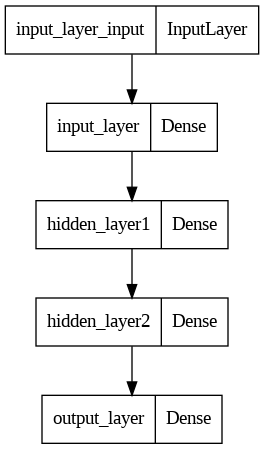

In [ ]:
plot_model(model=model)

# visualizing model's prediction

In [ ]:
# Evaluate on the test data

model.evaluate(x_test,y_test)



4/4 [==============================] - 0s 5ms/step - loss: 0.9578 - mean_squared_error: 1.1192


[0.9577726721763611, 1.119189977645874]

In [ ]:
len(x_train)

400

In [ ]:
len(y_train)

400

In [ ]:
# calculating both mse and mae

prediction1 = model.predict(x_test)

actual1 = y_test

# squeezing the dimension to get the calculation right!
prediction1 = tf.squeeze(tf.constant(prediction1))

mse = tf.metrics.mean_squared_error(actual1,prediction1)
mae = tf.metrics.mean_absolute_error(actual1,prediction1)
huber = tf.keras.losses.Huber()(actual1,prediction1)

mae,mse,huber


4/4 [==============================] - 0s 3ms/step


(<tf.Tensor: shape=(), dtype=float32, numpy=0.9577727>,
 <tf.Tensor: shape=(), dtype=float32, numpy=1.11919>,
 <tf.Tensor: shape=(), dtype=float32, numpy=0.52055174>)

In [ ]:
def errors(actual,prediction):

  lis = []

  prediction = tf.squeeze(prediction)
  mse = tf.metrics.mean_squared_error(actual,prediction)
  mae = tf.metrics.mean_absolute_error(actual,prediction)
  huber = tf.keras.losses.Huber()(actual,prediction)

  lis.append(('Mse: ',mse.numpy()))
  lis.append(('Mae: ',mae.numpy()))
  lis.append(('huber: ',huber.numpy()))


  return lis





In [ ]:
errors(actual1,prediction1)

[('Mse: ', 1.11919), ('Mae: ', 0.9577727), ('huber: ', 0.52055174)]

4/4 [==============================] - 0s 7ms/step


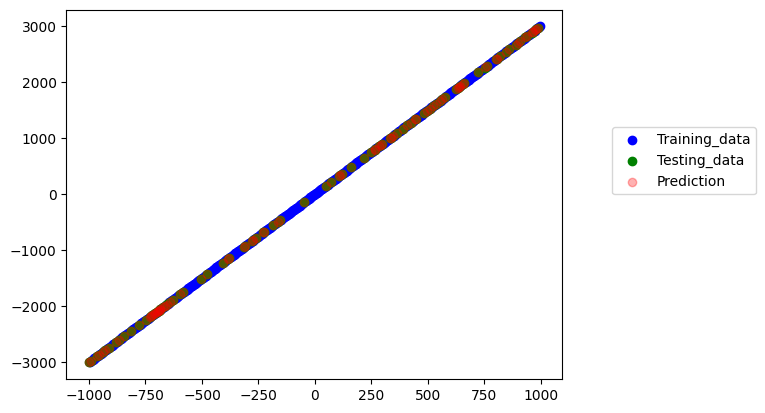

In [ ]:
def plot_predictions(x_train,y_train,x_test,y_test):

  # plotting the training data in blue
  plt.scatter(x_train,y_train,color='blue',label='Training_data')

  # plotting the testing data in green
  plt.scatter(x_test,y_test,color='green',label='Testing_data')

  # plotting the predictions in red
  prediction = model.predict(x_test)
  actual = y_test

  plt.scatter(x_test,prediction,color='red',label='Prediction',alpha=0.3)


  plt.legend(loc=(1.1,0.5))

  plt.show()



plot_predictions(x_train,y_train,x_test,y_test)



# conclusion:

since the red dots perfectly align with the green dots, they merge. which means that the predictions match the actual data(perhaps with a little bit of variance).

# Experimenting with data

1. decrease the data points
2. increase the epochs to 300

# day 124 and day 125

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.utils import plot_model

In [ ]:
# trail2: experiment with 300 epochs

# x and y
x = np.arange(-100,100,2)
y = 3*x + 2

# random seed_settting
tf.random.set_seed(42)

# model_building
model2 = tf.keras.Sequential()
model2.add(tf.keras.layers.Dense(30,input_shape=[1],name='input_layer'))
model2.add(tf.keras.layers.Dense(80,name='hidden_layer1'))
model2.add(tf.keras.layers.Dense(90,name='hidden_layer2'))
model2.add(tf.keras.layers.Dense(1,activation='linear',name='output_layer'))

# compilation:
model2.compile(loss=tf.keras.losses.MeanAbsoluteError(),
              optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001),
              metrics=[tf.keras.metrics.MeanSquaredError()])

#splitting
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2,random_state=42)

# conversion to tensors
x_train = tf.constant(x_train,dtype=tf.float32)
x_test = tf.constant(x_test,dtype=tf.float32)
y_train = tf.constant(y_train,dtype=tf.float32)
y_test = tf.constant(y_test,dtype=tf.float32)

model2.fit(x_train,y_train,epochs=300,verbose=False)




In [ ]:
actual2 = y_test
prediction2 = model2.predict(x_test)

1/1 [==============================] - 0s 60ms/step


1/1 [==============================] - 0s 31ms/step


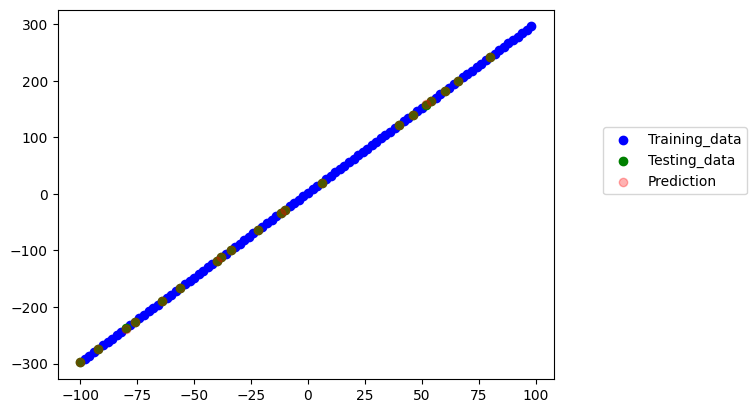

In [ ]:
plot_predictions(x_train,y_train,x_test,y_test)

In [ ]:
errors(actual2,prediction2)

[('Mse: ', 0.030281523), ('Mae: ', 0.15492344), ('huber: ', 0.015140762)]

In [ ]:
model.predict([9,10,11])

1/1 [==============================] - 0s 50ms/step


array([[29.024857],
       [32.02652 ],
       [35.028183]], dtype=float32)

# comparing the results of our experiments

In [ ]:

model_results = [['model:',errors(actual1,prediction1)[0][1],errors(actual1,prediction1)[1][1],errors(actual1,prediction1)[2][1]],
                 ['model2:',errors(actual2,prediction2)[0][1],errors(actual2,prediction2)[1][1],errors(actual2,prediction2)[2][1]]]

DataFrame = pd.DataFrame(model_results,columns=['Model','Mse','Mae','Huber'])

DataFrame

,Model,Mse,Mae,Huber
0,model:,1.119190,0.957773,0.520552
1,model2:,0.030282,0.154923,0.015141


In [ ]:
model2.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_layer (Dense)         (None, 30)                60        
                                                                 
 hidden_layer1 (Dense)       (None, 80)                2480      
                                                                 
 hidden_layer2 (Dense)       (None, 90)                7290      
                                                                 
 output_layer (Dense)        (None, 1)                 91        
                                                                 
Total params: 9,921
Trainable params: 9,921
Non-trainable params: 0
_________________________________________________________________


# saving a tensorflow model

# format:
model.save('name_of_the_file')

# format for saving in as a HDF5 file:
model.save('name_of_the_file.h5)


* .h5 files can be used on different programming platforms such as on java,c++, so it is pretty much handy when you want to transfer things across systems.

In [ ]:
# normal save

model2.save('first_save_tensorflow_model2')

In [ ]:
# h5 save

model2.save('first_hdf5_model2.h5')

# load the saved model and use it

# format:
tf.keras.models.load_model('path of the file')

* copy the address of the file by clicking on the three button nearby the file you want to know the address of and click 'copy path'.

In [ ]:
# loading the normally saved model

retrieved_1 = tf.keras.models.load_model("/content/first_save_tensorflow_model2")
retrieved_1.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_layer (Dense)         (None, 30)                60        
                                                                 
 hidden_layer1 (Dense)       (None, 80)                2480      
                                                                 
 hidden_layer2 (Dense)       (None, 90)                7290      
                                                                 
 output_layer (Dense)        (None, 1)                 91        
                                                                 
Total params: 9,921
Trainable params: 9,921
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# loading the .h5 file

retrieved_2 = tf.keras.models.load_model('/content/first_hdf5_model2.h5')

retrieved_2.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_layer (Dense)         (None, 30)                60        
                                                                 
 hidden_layer1 (Dense)       (None, 80)                2480      
                                                                 
 hidden_layer2 (Dense)       (None, 90)                7290      
                                                                 
 output_layer (Dense)        (None, 1)                 91        
                                                                 
Total params: 9,921
Trainable params: 9,921
Non-trainable params: 0
_________________________________________________________________


# comparing the performance of the loaded_model with the model2

In [ ]:
retrieved_1.predict([9,10,11])

1/1 [==============================] - 0s 70ms/step


array([[28.968708],
       [31.965677],
       [34.962646]], dtype=float32)

In [ ]:
retrieved_2.predict([9,10,11])

1/1 [==============================] - 0s 79ms/step


array([[28.968708],
       [31.965677],
       [34.962646]], dtype=float32)

# conclusion:

# i see not much difference

# day 125 and day 126

# **Insurance Data**

# playing with data from an insurance company to predict the cost of insurance based on the person's features

In [ ]:
import tensorflow as tf
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [ ]:
df = pd.read_csv('https://raw.githubusercontent.com/stedy/Machine-Learning-with-R-datasets/master/insurance.csv')
df.head() # importing directly from the web.

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [ ]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


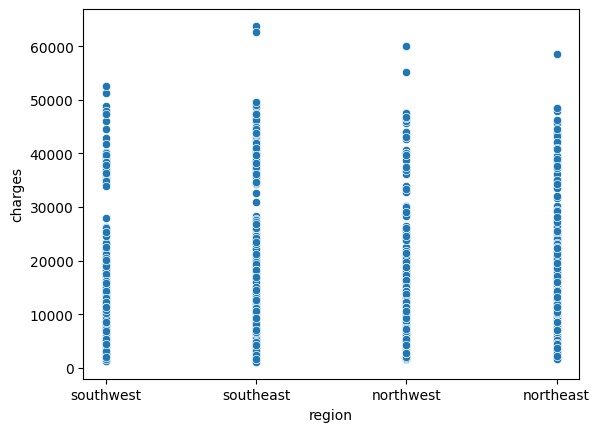

In [ ]:
sns.scatterplot(data=df,x='region',y='charges');

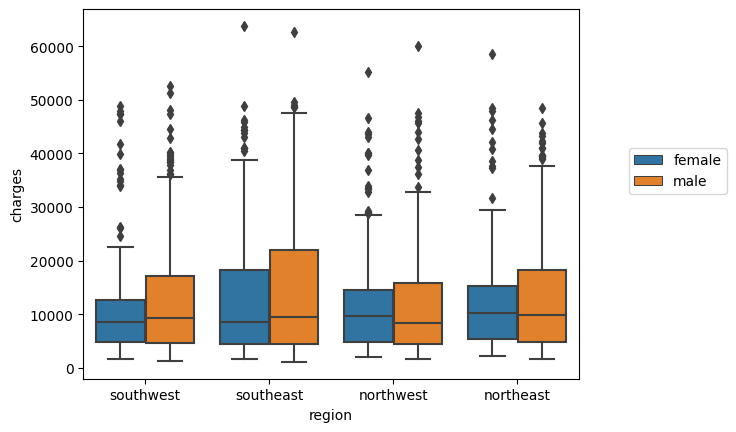

In [ ]:
sns.boxplot(data=df,x='region',y='charges',hue='sex')

# # zooming in
# plt.ylim([0,30000])

plt.legend(loc=(1.1,0.5))
plt.show()

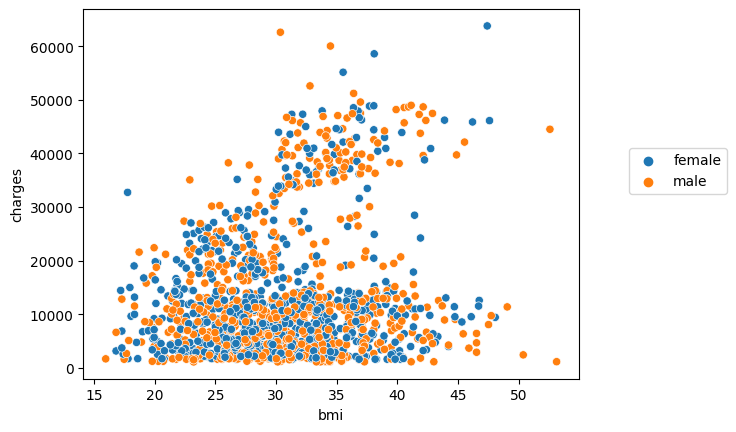

In [ ]:
sns.scatterplot(data=df,x='bmi',y='charges',hue='sex')


plt.legend(loc=(1.1,0.5))
plt.show()

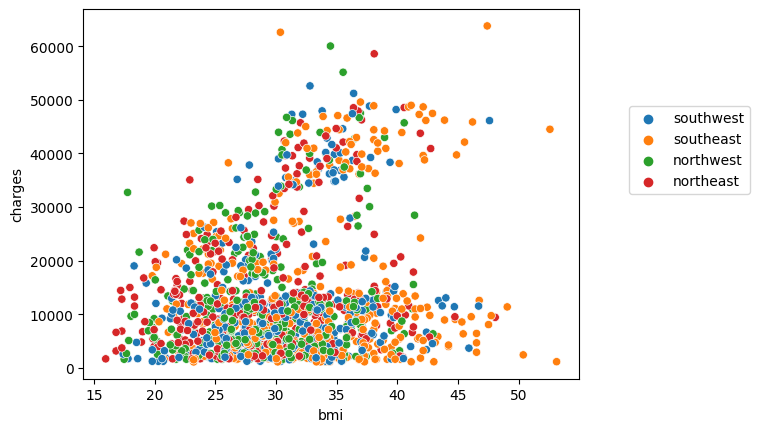

In [ ]:
sns.scatterplot(data=df,x='bmi',y='charges',hue='region')


plt.legend(loc=(1.1,0.5))
plt.show()

In [ ]:
# one hot encoded df (to transform categorical objects such as 'female','male','southwest' etc to numberical values)


df = pd.get_dummies(df)

df.head()


,age,bmi,children,charges,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,0,16884.92400,1,0,0,1,0,0,0,1
1,18,33.770,1,1725.55230,0,1,1,0,0,0,1,0
2,28,33.000,3,4449.46200,0,1,1,0,0,0,1,0
3,33,22.705,0,21984.47061,0,1,1,0,0,1,0,0
4,32,28.880,0,3866.85520,0,1,1,0,0,1,0,0


In [ ]:
# choosing feature and labels

x = df.drop('charges',axis=1)
y = df['charges']

x

,age,bmi,children,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,0,1,0,0,1,0,0,0,1
1,18,33.770,1,0,1,1,0,0,0,1,0
2,28,33.000,3,0,1,1,0,0,0,1,0
3,33,22.705,0,0,1,1,0,0,1,0,0
4,32,28.880,0,0,1,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...
1333,50,30.970,3,0,1,1,0,0,1,0,0
1334,18,31.920,0,1,0,1,0,1,0,0,0
1335,18,36.850,0,1,0,1,0,0,0,1,0
1336,21,25.800,0,1,0,1,0,0,0,0,1


In [ ]:
# splitting the training and testing data

from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2,random_state=42)

# tensoring the training and testing data
x_train = tf.constant(x_train, dtype=tf.float32)
x_test  = tf.constant(x_test,  dtype=tf.float32)
y_train = tf.constant(y_train, dtype=tf.float32)
y_test  = tf.constant(y_test,  dtype=tf.float32)

In [ ]:
# building the neural network to predict the insurance charges based off features.

model1 = tf.keras.Sequential()
model1.add(tf.keras.layers.Dense(10,input_shape=[11],name='Input_Layer')) # 11 features therefore 11 inputs
model1.add(tf.keras.layers.Dense(1,name='Output_layer'))


# compilation
model1.compile(loss=tf.keras.losses.MeanAbsoluteError(),
               optimizer=tf.keras.optimizers.SGD(),
               metrics=[tf.keras.metrics.MeanSquaredError()])


# fitting
model1.fit(x_train,y_train,epochs=100)


Epoch 1/100
34/34 [==============================] - 6s 5ms/step - loss: 8476.1025 - mean_squared_error: 185414416.0000
Epoch 2/100
34/34 [==============================] - 0s 4ms/step - loss: 7892.3711 - mean_squared_error: 171573328.0000
Epoch 3/100
34/34 [==============================] - 0s 5ms/step - loss: 7600.5439 - mean_squared_error: 165334016.0000
Epoch 4/100
34/34 [==============================] - 0s 6ms/step - loss: 7713.7231 - mean_squared_error: 165186192.0000
Epoch 5/100
34/34 [==============================] - 0s 7ms/step - loss: 7804.6421 - mean_squared_error: 164653488.0000
Epoch 6/100
34/34 [==============================] - 0s 5ms/step - loss: 7777.2446 - mean_squared_error: 166233296.0000
Epoch 7/100
34/34 [==============================] - 0s 8ms/step - loss: 7751.1685 - mean_squared_error: 162668144.0000
Epoch 8/100
34/34 [==============================] - 0s 8ms/step - loss: 7668.4155 - mean_squared_error: 162796832.0000
Epoch 9/100
34/34 [=====================

In [ ]:
model1.evaluate(x_test,y_test)

9/9 [==============================] - 0s 4ms/step - loss: 6340.6270 - mean_squared_error: 118323032.0000


[6340.626953125, 118323032.0]

In [ ]:
# seeing the performance after including the learning rate

# building the model
model2 =  tf.keras.Sequential()
model2.add(tf.keras.layers.Dense(10,input_shape=[11],name='input_layer'))
model2.add(tf.keras.layers.Dense(1,name='output_layer'))

# compiling the model
model2.compile(loss=tf.keras.losses.MeanAbsoluteError(),
              optimizer=tf.keras.optimizers.SGD(learning_rate=0.001),
              metrics=[tf.keras.metrics.MeanSquaredError()])

# fitting the model
model2.fit(x_train,y_train,epochs=100)

Epoch 1/100
34/34 [==============================] - 1s 5ms/step - loss: 13199.3945 - mean_squared_error: 318272416.0000
Epoch 2/100
34/34 [==============================] - 0s 5ms/step - loss: 10154.8340 - mean_squared_error: 236925728.0000
Epoch 3/100
34/34 [==============================] - 0s 5ms/step - loss: 7307.0356 - mean_squared_error: 156295632.0000
Epoch 4/100
34/34 [==============================] - 0s 4ms/step - loss: 7236.8613 - mean_squared_error: 156586672.0000
Epoch 5/100
34/34 [==============================] - 0s 5ms/step - loss: 7182.3584 - mean_squared_error: 156569920.0000
Epoch 6/100
34/34 [==============================] - 0s 5ms/step - loss: 7113.4868 - mean_squared_error: 159739168.0000
Epoch 7/100
34/34 [==============================] - 0s 5ms/step - loss: 7051.7275 - mean_squared_error: 160100128.0000
Epoch 8/100
34/34 [==============================] - 0s 6ms/step - loss: 6981.3096 - mean_squared_error: 162644480.0000
Epoch 9/100
34/34 [===================

In [ ]:
# adding few_more layers to the model
tf.random.set_seed(42)


# building the model
model3 = tf.keras.Sequential()
model3.add(tf.keras.layers.Dense(500,input_shape=[11],name='input_layer'))
model3.add(tf.keras.layers.Dense(450,activation='relu',name='hidden_layer1'))
model3.add(tf.keras.layers.Dense(180,activation='relu',name='hidden_layer2'))
model3.add(tf.keras.layers.Dense(189,activation='relu',name='hidden_layer3'))
model3.add(tf.keras.layers.Dense(150,activation='relu',name='hidden_layer4'))
model3.add(tf.keras.layers.Dense(100,activation='relu',name='hidden_layer5'))
model3.add(tf.keras.layers.Dense(1,name='output_layer'))


# compiling the model
model3.compile(loss=tf.keras.losses.MeanAbsoluteError(),
           optimizer=tf.keras.optimizers.Adam(),
           metrics=[tf.keras.metrics.MeanSquaredError()])

# fitting the model
history = model3.fit(x_train,y_train,epochs=100,verbose=False)

In [ ]:
model3.evaluate(x_test,y_test)

9/9 [==============================] - 0s 4ms/step - loss: 1449.7070 - mean_squared_error: 19308648.0000


[1449.70703125, 19308648.0]

# how bad is our model?

# **we have to see the mean and median of y_train then decide how far off are we from the centre, that is how much std our model creates from the centre. the lower the std (the number our model predicts versus reality) the better.**

In [ ]:
np.mean(y_train), np.median(y_train)

(13346.09, 9575.442)

# plotting the history variable

Text(0.5, 0, 'epochs')

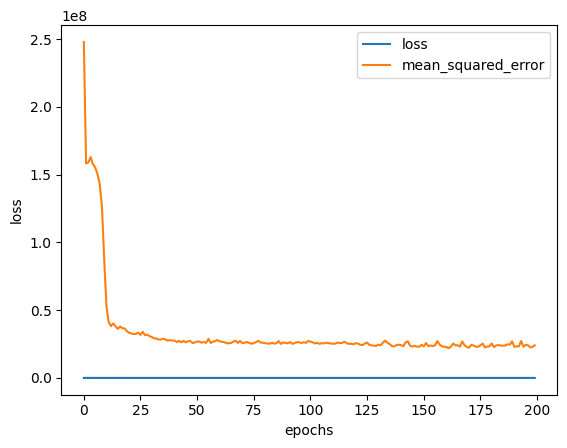

In [ ]:
pd.DataFrame(history.history).plot()
plt.ylabel('loss')
plt.xlabel('epochs')
#plt.ylim([0.25,0.5])


# lets see what changes in our model after standaridizing the dataset

# standardization and normalization

# To understand Scalers, Standardizers, and normalizers:

▶[click me to understand when to use MinMaxScaler,RobustScaler,StandardScaler](https://towardsdatascience.com/scale-standardize-or-normalize-with-scikit-learn-6ccc7d176a02)

# day 127

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import tensorflow as tf
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import MinMaxScaler,OneHotEncoder,StandardScaler


In [ ]:
df = pd.read_csv('https://raw.githubusercontent.com/stedy/Machine-Learning-with-R-datasets/master/insurance.csv')
df.head() # importing directly from the web.

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [ ]:
from keras.utils import mode_keys
from sklearn.compose         import make_column_transformer
from sklearn.preprocessing   import MinMaxScaler,OneHotEncoder
from sklearn.model_selection import train_test_split

ct = make_column_transformer(
    (MinMaxScaler(),['age','bmi','children']),
    (OneHotEncoder(handle_unknown='ignore'),['sex','smoker','region'])
)


# create and x and y
x = df.drop('charges',axis=1)
y = df['charges']

# train_test_splitting
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2,random_state=42)

# transforming the data using make_column_transformer(ct)
ct.fit(x_train)
x_train_transformed = ct.transform(x_train)
x_test_transformed = ct.transform(x_test)




In [ ]:
x_train.loc[0]

age                19
sex            female
bmi              27.9
children            0
smoker            yes
region      southwest
Name: 0, dtype: object

In [ ]:
x_train_transformed[0]

array([0.60869565, 0.10734463, 0.4       , 1.        , 0.        ,
       1.        , 0.        , 0.        , 1.        , 0.        ,
       0.        ])

In [ ]:
np.shape(x_train_transformed)

(1070, 11)

In [ ]:
# set the random seed for reproducability
tf.random.set_seed(42)

# build the neural network
model4 = tf.keras.Sequential()
model4.add(tf.keras.layers.Dense(500,input_shape=[11],name='input_layer'))
model4.add(tf.keras.layers.Dense(450,name='hidden_layer1'))
model4.add(tf.keras.layers.Dense(180,name='hidden_layer2'))
model4.add(tf.keras.layers.Dense(189,name='hidden_layer3'))
model4.add(tf.keras.layers.Dense(150,name='hidden_layer4'))
model4.add(tf.keras.layers.Dense(100,name='hidden_layer5'))
model4.add(tf.keras.layers.Dense(1,name='output_layer'))

# compiling the model
model4.compile(loss=tf.keras.losses.MeanAbsoluteError(),
               optimizer=tf.keras.optimizers.Adam(),
               metrics=[tf.keras.metrics.MeanSquaredError()])


# fit the model with the data
history = model4.fit(x_train_transformed,y_train,epochs=30,verbose=False)

In [ ]:
# evaluate the model

model4.evaluate(x_test_transformed,y_test)

9/9 [==============================] - 0s 3ms/step - loss: 3284.4409 - mean_squared_error: 40354336.0000


[3284.44091796875, 40354336.0]

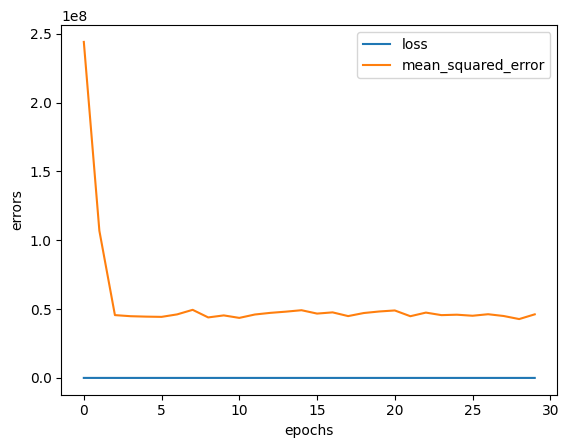

In [ ]:
pd.DataFrame(history.history).plot()
plt.xlabel('epochs')
plt.ylabel('errors')

plt.show()